# Machine Learning 2 - K-Nearest Neighbors Regressor

This notebook is based on the following references:
- Similarity Based Learning: the k-Nearest Neighbor (kNN) RegressionNotebook, Christopher Monterola
- Introduction to Machine Learning with Python, A. Mueller and S. Guido, O'Reilly 2017 (see https://github.com/rohanchikorde/Data-Science books/blob/master/Introduction%20to%20Machine%20Learning%20with%20Python.pdf and https://github.com/amueller/introduction_to_ml_with_python/find/master)

*Certain code snippets are assisted by ChatGPT

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


## Introduction
We have discussed the how to implement a classifier model in our previous notebook using KNN Classifier. **Classifiers** predicts outcome based on specific labels or classes from our data. In this notebook, we will discuss the second type of supervised machine learning algorithms - the **Regressors**. Unlike classifiers, Regression algorithms tries to predict a continuous number (think of float); for example: predicting stock price, forecasting population, and for this notebook, we will try to estimate house prices in Boston. We will be using a variation of the KNN classifier called the KNN regressor.

## KNN Regression
While many people are familiar with regression models that involve fitting a line or curve, such as linear regression, K-Nearest Neighbors (KNN) regression uses a different approach. Instead of drawing a line through the data, KNN regression estimates the value of the response variable based on the 'k' closest points in the data space.

For a given point you want to predict, KNN finds the 'k' nearest points in the training data and averages their values to produce the prediction. KNN can capture complex relationships without assuming the structure of the relationship between independent and dependent variables. The key parameter in KNN is 'k', which needs to be tuned to find the optimal number of neighbors for the best prediction accuracy.

### Application of KNN Regression - The Boston Housing Dataset
In this notebook, we will use the KNN algorithm for a regression task on the Boston Housing dataset comprised of information collected by the U.S. Census Service regarding housing in the area of Boston Mass. It has several predictor variables such as average number of rooms per dwelling, per capita crime rate by town, etc., and the response variable is the Median value of owner-occupied homes in $1000's (medv).

In the upcoming sections, we will use the KNN regression approach to **predict the median value of homes based on various predictor variables from the Boston housing dataset**. We'll explore how to load the data, preprocess it, train a KNN regressor, and evaluate its performance. 

#### Data Loading
Unlike the iris dataset, we will use our own csv file for processing. Typically, we need to upload the dataset to the same folder of our notebook (or atleaset identify the filepath) in order to process it. In Google Colab, we can temporarily appload it in our session storage, or we can access a permanent file in a google drive and mount the drive to our notebook. You can explore this option later, but for now, we'll upload our notebook in our temporary session storage.

In order to load our data, we'll use the pandas function `pd.read_csv(<file_path>)` and store it as boston_df.

In [31]:
# Replace 'Boston.csv' with the path to the CSV file once uploaded
boston_df = pd.read_csv('Boston.csv')
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


The following data dictionary describes the dataset columns:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \\$10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - \% lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

We can do some basic analysis of this dataset using the methods `.describe()` and `.plot.scatter()`.

<Axes: xlabel='crim', ylabel='medv'>

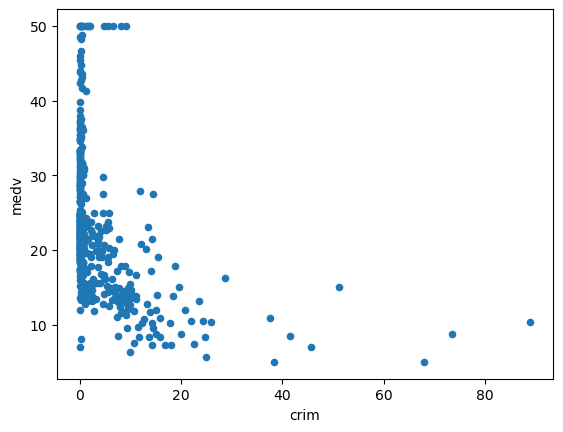

In [34]:
# Get summary statistics of the dataframe
#boston_df.describe()

# Get summary statistics of the dataframe
boston_df.plot.scatter('crim','medv')


### Regression Task
Now that we have prepared our dataset, we can now create our machine learning model. From this, we will now use `'medv'` as our target and the rest as our feature variables.

In [36]:
# Splitting our X and y
X = boston_df.drop('medv', axis=1)
y = boston_df['medv']

In [37]:
# Splitting to our Test and Train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [38]:
# Running our Regression Model
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

### Accuracy Metrics for Regression Models
Note that we assess the accuracy of our models differently from classifier models; instead of having a correct or wrong prediction, we need to know how far is our prediction from the actual value. Typically, we use R-Squared value to asses how good our model can fit the data, but in most ML applications, we typically use the Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) instead. MSE measures the average squared difference between the estimated values (predicted by the model) and the actual value.

MSE is particularly useful because it punishes larger errors more severely than smaller ones due to the squaring of each term. This means that models with large discrepancies in predictions will have a disproportionately high MSE. Squaring the errors also has the benefit of converting all the errors to positive values, avoiding the issue of positive and negative errors canceling each other out. However, it does change the units of the measure (to the units of the output variable squared), which can make interpretation less intuitive (this is where the RMSE would come in.)


However, note that the property of being sensitive to large errors can be beneficial, it also means that MSE is highly sensitive to outliers. A single large error can significantly skew the MSE, giving an impression that a model is performing worse than it actually is in predicting the majority of observations. Another limitation is that the value of MSE is dependent on the scale of the outcome variable, so comparing MSE across different datasets or regression problems with different scales isn't meaningful.

Despite these limitations, MSE remains a popular metric because it is simple to understand and implement, and it provides a useful indication of the quality of a model, especially when combined with other metrics like the Root Mean Squared Error (RMSE) and the R-squared value.

In [39]:
#Testing our Prediction
y_pred = knn_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 39.16274088669951
Root Mean Squared Error: 6.25801413282996
R^2 Score: 0.5266229764225854


Here, we can see that our model has an MSE of 39.16 and an RMSE of 6.26. This means that our prediction has an error of around \\$6260. We can also see how our model performed by looking at Actual vs Predicted Values.

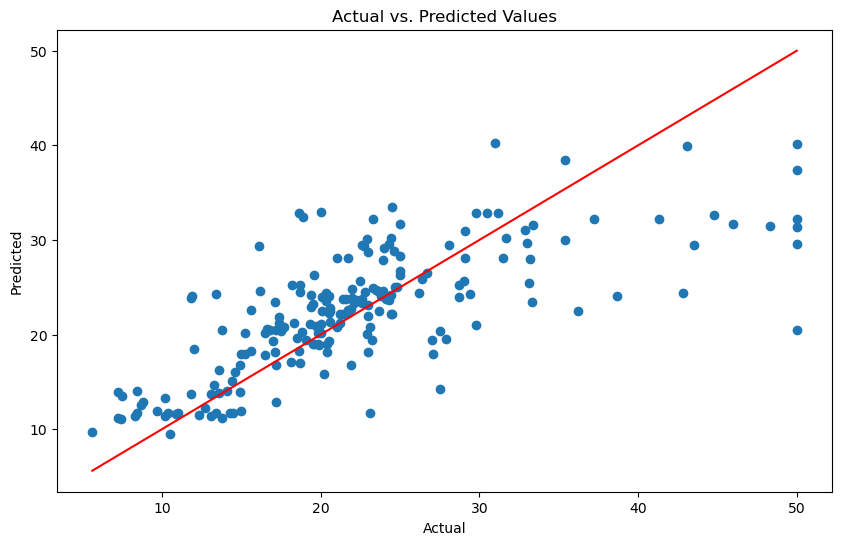

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

### Finding the best `k` value
Finally, we can now iterate to identify the best `k` value, similar to what we did in KNN Classifier. 

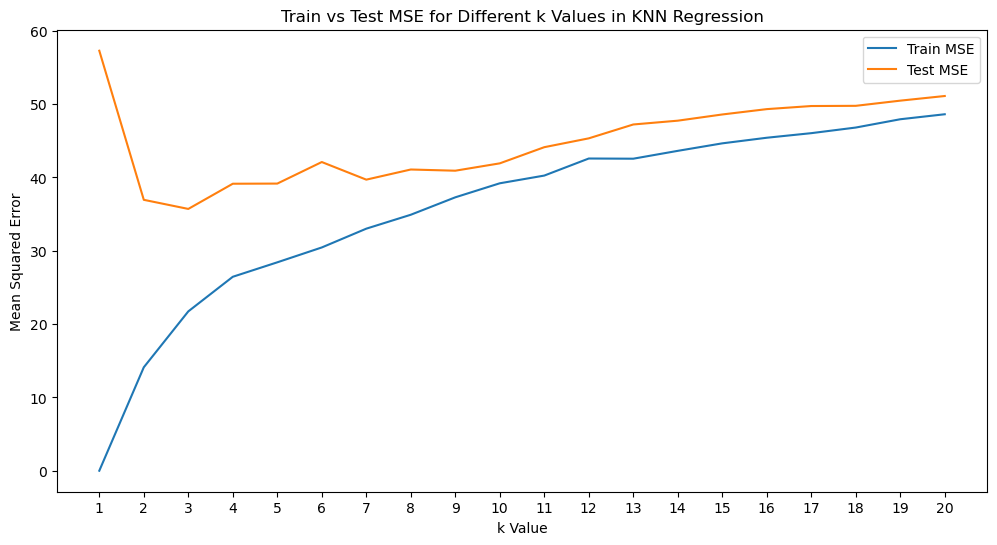

In [47]:
# Initialize lists to store MSE for each k value for both train and test sets
train_mse_values = []
test_mse_values = []

# Test various values of k
for k in range(1, 21):
    # Set up the KNN regressor with the current k value
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    
    # Fit the KNN model to the training data
    knn_reg.fit(X_train, y_train)
    
    # Predict on the training data and calculate MSE
    y_train_pred = knn_reg.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mse_values.append(train_mse)
    
    # Predict on the testing data and calculate MSE
    y_test_pred = knn_reg.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mse_values.append(test_mse)

# Plot MSE values over different k values for both train and test sets
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), train_mse_values, label='Train MSE')
plt.plot(range(1, 21), test_mse_values, label='Test MSE')
plt.xticks(range(1,21))
plt.xlabel('k Value')
plt.ylabel('Mean Squared Error')
plt.title('Train vs Test MSE for Different k Values in KNN Regression')
plt.legend()
plt.show()

#### Guide Questions:
1. What is the optimal K value?
1. Why cant we use k = 1?
1. What happens as we increase K indefinitely?

In [ ]:
#Answer Here

### Key Points

**1. Good data generally translates to good prediction.**

The unreasonable effectiveness of data -- Google's Research Director Peter Norvig claiming that "We don’t have better algorithms. We just have more data." 

**2. k-NN regression and classifier can only interpolate**

Again, kNN is an *instance based* algorithm and can only make predictions based on its corpora of data. For values outside the range of the training samples (max or min), it will fail.

**3. Single most important parameter is n_neighbors**

Scanning over the accuracy as a function of **n_neighbors** improves the effectiveness and reliability of the algorithm.

The optimal choice of the value **n_neighbors** is highly data-dependent: in general a larger k suppresses the effects of noise, but makes the classification boundaries less distinct.